In [72]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs.datasets


In [73]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [74]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
class Dense:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(output_dim, input_dim) * 0.01
        self.biases = np.zeros((1,output_dim))
    
    def forward(self, x):
        self.input = x           
        self.output = np.dot(x, self.weights) + self.biases
        
    
    def backward(self, dL_dout):
        self.dweights = dL_dout.T @ self.input  
        self.dbias = np.sum(dL_dout, axis=0) 
        dL_dinput = dL_dout @ self.weights  
        return dL_dinput


In [ ]:
class ReluAct:
    def forward(self, x):
        self.input = x
        self.output = np.maximum(0, x)
        return self.output
    
    def backward(self, dL_dout):
        dL_dinput = dL_dout * (self.input > 0).astype(float)
        return dL_dinput


In [ ]:
class Softmax:
    def forward(self, x):
        max_row = np.max(x, axis=1, keepdims=True)
        normalize_row = x - max_row
        expo = np.exp(normalize_row)
        self.output = expo / np.sum(expo, axis=1, keepdims=True)
        return self.output



In [ ]:
class CrossEntropyLoss:
    def forward(self, y_pred, y_true):
        if y_true.ndim == 2 and y_true.shape[1] != y_pred.shape[1]:
            raise ValueError("y_true shape does not match y_pred classes")
        if y_true.ndim == 1 or (y_true.ndim == 2 and y_true.shape[1] == 1):
            y_one_hot = np.zeros_like(y_pred)
            y_one_hot[np.arange(y_true.size), y_true.flatten()] = 1
            y_true = y_one_hot
        
        y_pred_clipped = np.clip(y_pred, 1e-12, 1.0)
        sample_losses = -np.sum(y_true * np.log(y_pred_clipped), axis=1)
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean(sample_losses)
    
    def backward(self):
        n_samples = self.y_true.shape[0]
        dL_dy = (self.y_pred - self.y_true) / n_samples
        return dL_dy



In [80]:
class SGDOptimizerRMSprop:
    def __init__(self, layer,lr,betaDecay=0.9,epsilon=1e-8):
        self.vt = 0
        self.lr=lr
        self.epsilon=epsilon
        self.beta = betaDecay
        self.layer = layer
        self.vt_w = np.zeros_like(self.layer.weights)
        self.vt_b = np.zeros_like(self.layer.biases)

        
    def update(self):
        self.vt_w = self.beta * self.vt_w + (1-self.beta) * (self.layer.dweights**2)
        self.vt_b = self.beta * self.vt_b + (1-self.beta)*(self.layer.dbias**2)

        self.layer.weights = self.layer.weights - (self.lr)*(self.layer.dweights)/(np.sqrt(self.vt_w+self.epsilon))
        self.layer.biases = self.layer.biases - (self.lr)*(self.layer.dbias)/(np.sqrt(self.vt_b+self.epsilon))





In [81]:
class SGDOptimizerMomentum:
    def __init__(self, layer, lr, beta=0.9):
        self.lr = lr
        self.beta = beta
        self.layer = layer
        self.vt_w = np.zeros_like(self.layer.weights)
        self.vt_b = np.zeros_like(self.layer.biases)

    def update(self):
        self.vt_w = self.beta * self.vt_w +  self.layer.dweights
        self.vt_b = self.beta * self.vt_b +  self.layer.dbias
        
        self.layer.weights = self.layer.weights - self.lr *self.vt_w
        self.layer.biases = self.layer.biases -   self.lr *self.vt_b

In [82]:
class SGDOptimizerADAGrad:
    def __init__(self, layer,lr):
        self.vt = 0
        self.lr=lr

        self.layer = layer
        self.vt_w = np.zeros_like(self.layer.weights)
        self.vt_b = np.zeros_like(self.layer.biases)
        self.left_w = None
        self.left_b = None
    def update(self):
        self.vt_w = self.vt_w + self.layer.dweights**2
        self.vt_b = self.vt_b + self.layer.dbiases**2
        self.left_w =   (self.lr )/np.sqrt(self.vt_w+0.01)
        self.left_b =   (self.lr )/np.sqrt(self.vt_b+0.01)

        self.layer.weights = self.layer.weights - self.left_w*self.layer.dweights
        self.layer.biases = self.layer.biases - self.left_b* self.layer.dbiases





In [83]:
# class SGDOptimizerADAM:
#     def __init__(self, layer,lr,betaDecay1=0.01,betaDecay2=0.01):
#         self.vt = 0
#         self.lr=lr
#         self.beta1 = betaDecay1
#         self.beta2 = betaDecay2
#         self.layer = layer
#         self.wt_w = np.zeros_like(self.layer.weights)
#         self.wt_b = np.zeros_like(self.layer.biases)        
#         self.vt_w = np.zeros_like(self.layer.weights)
#         self.vt_b = np.zeros_like(self.layer.biases)
#         self.left_w = None
#         self.left_b = None
#     def update(self):
#         self.wt_w = self.beta2*self.wt_w + (1-self.beta2)*self.layer.dweights
#         self.wt_b = self.beta2*self.wt_b + (1-self.beta2)*self.layer.dbiases
#         self.vt_w = self.beta1*self.vt_w + (1-self.beta1)*self.layer.dweights
#         self.vt_b = self.beta1*self.vt_b + (1-self.beta1)*self.layer.dbiases
#         self.left_w = (self.lr/(np.sqrt(self.vt_w+0.01)))*self.wt_w
#         self.left_b = (self.lr/(np.sqrt(self.vt_b+0.01)))*self.wt_b
#         self.layer.weights = self.layer.weights - self.left_w
#         self.layer.biases = self.layer.biases - self.left_b




class SGDOptimizerADAM:
    def __init__(self, layer, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.layer = layer
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m_w = np.zeros_like(layer.weights)  # first moment
        self.m_b = np.zeros_like(layer.biases)
        self.v_w = np.zeros_like(layer.weights)  # second moment
        self.v_b = np.zeros_like(layer.biases)
        self.t = 0  # timestep

    def update(self):
        self.t += 1

        self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * self.layer.dweights
        self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * self.layer.dbias

        self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (self.layer.dweights ** 2)
        self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (self.layer.dbias ** 2)

        m_hat_w = self.m_w / (1 - self.beta1 ** self.t)
        m_hat_b = self.m_b / (1 - self.beta1 ** self.t)
        v_hat_w = self.v_w / (1 - self.beta2 ** self.t)
        v_hat_b = self.v_b / (1 - self.beta2 ** self.t)

        # Update parameters
        self.layer.weights -= self.lr * m_hat_w / (np.sqrt(v_hat_w) + self.epsilon)
        self.layer.biases -= self.lr * m_hat_b / (np.sqrt(v_hat_b) + self.epsilon)


In [ ]:
    
class SGDOptimizer:
    def __init__(self,betaDecay,learning_rate=0.001):
        self.lr = learning_rate
        self.beta = betaDecay
        self.momentum = None  
    def update(self,layer):
        if self.beta==0:
            layer.weights = layer.weights - self.lr * layer.dweights 
            layer.biases = layer.biases - self.lr * layer.dbias
        else:
            if self.momentum is None:
                self.momentum = SGDOptimizerMomentum(layer, self.lr, self.beta)
            self.momentum.update()
        
    
        


In [85]:
def accuracy(y_pred, y_true):
    """Calculate accuracy"""
    y_pred_classes = np.argmax(y_pred, axis=1)
    return np.mean(y_pred_classes == y_true)


In [86]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.33, random_state=42)


In [87]:
X, y = nnfs.datasets.spiral_data(samples=1000, classes=3)



In [ ]:
from nnfs.datasets import spiral_data


In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Dense(2, 64)


In [ ]:
np.random.seed(42)

dense = Dense(input_dim=3, output_dim=64)
relu = ReluAct()
softmax = Softmax()
loss_func = CrossEntropyLoss()
optimizer = SGDOptimizer(learning_rate=0.01,betaDecay=0)

losses = []
accuracies = []

for it in range(10000):
    z = dense.forward(X)
    a = relu.forward(z)
    y_pred = softmax.forward(a)
    loss = loss_func.forward(y_pred, y)
    
    dL = loss_func.backward()
    dL = relu.backward(dL)
    dL = dense.backward(dL)
    optimizer.update(dense)
    
    acc = accuracy(y_pred, y.flatten())
    losses.append(loss)
    accuracies.append(acc)
    
    if it % 500 == 0:
        print(f"iter {it:05d}  loss {loss:.6f}  acc {acc:.4f}")

print("Training complete!, Without Momentum")

ValueError: shapes (3000,2) and (64,3) not aligned: 2 (dim 1) != 64 (dim 0)

In [ ]:
np.random.seed(42)
dense1 = Dense(input_dim=3, output_dim=64)
dense2 = Dense(input_dim=64, output_dim=3)

relu = ReluAct()
softmax = Softmax()
loss_func = CrossEntropyLoss()
optimizer = SGDOptimizer(learning_rate=0.01,betaDecay=0.9)

losses = []
accuracies = []

for it in range(10000):
    z = dense1.forward(X)
    a = relu.forward(z)
    new_z = dense2.forward(a)
    y_pred = softmax.forward(a)
    loss = loss_func.forward(y_pred, y)
    
    dL = loss_func.backward()
    dL = dense2.backward(dL)
    dL = relu.backward(dL)
    dL = dense1.backward(dL)
    optimizer.update(dense1)
    optimizer.update(dense2)

    acc = accuracy(y_pred, y.flatten())
    losses.append(loss)
    accuracies.append(acc)
    
    if it % 500 == 0:
        print(f"iter {it:05d}  loss {loss:.6f}  acc {acc:.4f}")

print("Training complete!, With Momentum")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [ ]:
X, y = nnfs.datasets.spiral_data(samples=1000, classes=3)


In [ ]:

# z = dense.forward(X_test)
# a = relu.forward(z)
# y_pred = softmax.forward(a)
# test_loss = loss_func.forward(y_pred, y_test)
# test_acc = accuracy(y_pred, y_test.flatten())
# print(f"\nTest loss: {test_loss:.6f}  Test acc: {test_acc:.4f}")



In [ ]:
# h = 0.02
# x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
# y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = dense.forward(np.c_[xx.ravel(), yy.ravel()])
# Z = relu.forward(Z)
# Z = softmax.forward(Z)
# Z = np.argmax(Z, axis=1).reshape(xx.shape)

# plt.contourf(xx, yy, Z, alpha=0.4)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
# plt.title('Decision Boundary')
# plt.show()

In [ ]:

# fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# axes[0].plot(losses)
# axes[0].set_xlabel('Iteration')
# axes[0].set_ylabel('Loss')
# axes[0].set_title('Training Loss')
# axes[0].grid(True)

# axes[1].plot(accuracies)
# axes[1].set_xlabel('Iteration')
# axes[1].set_ylabel('Accuracy')
# axes[1].set_title('Training Accuracy')
# axes[1].grid(True)

# plt.tight_layout()
# plt.show()

NameError: name 'test_loss' is not defined

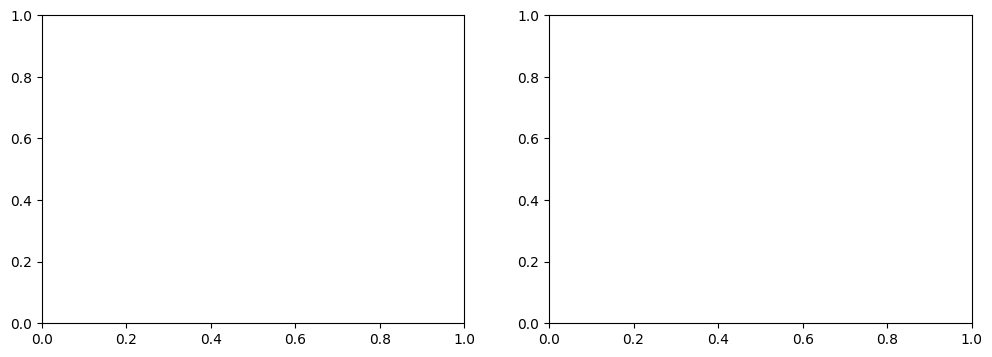

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(test_loss)
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')
axes[0].set_title('Testing Loss')
axes[0].grid(True)

axes[1].plot(test_acc)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Testing Accuracy')
axes[1].grid(True)

plt.tight_layout()
plt.show()